In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

In [2]:
df = pd.read_csv('airway.csv')

In [3]:
p1 = df.pvalue[df.groupidx == 'H']
p2 = df.pvalue[df.groupidx == 'L']

(array([ 3148.,   877.,   720.,   714.,   731.,   724.,   847.,   842.,
          885.,   866.,  1042.,  1193.,  1497.,   977.,  1762.,  3099.,
         1252.,  3679.,  1154.,  2029.]),
 array([  1.70856491e-136,   4.99985049e-002,   9.99970097e-002,
          1.49995515e-001,   1.99994019e-001,   2.49992524e-001,
          2.99991029e-001,   3.49989534e-001,   3.99988039e-001,
          4.49986544e-001,   4.99985049e-001,   5.49983553e-001,
          5.99982058e-001,   6.49980563e-001,   6.99979068e-001,
          7.49977573e-001,   7.99976078e-001,   8.49974583e-001,
          8.99973087e-001,   9.49971592e-001,   9.99970097e-001]),
 <a list of 20 Patch objects>)

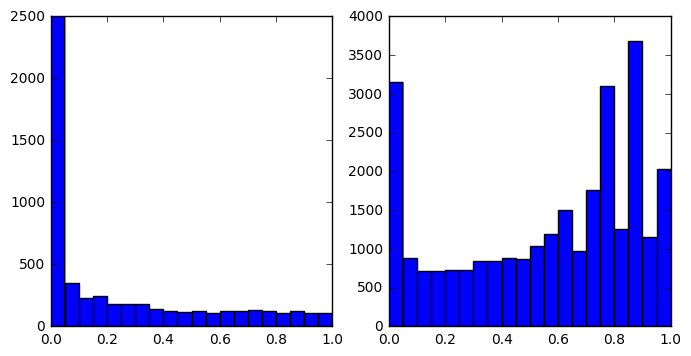

In [4]:
plt.figure(figsize = (8,4))
plt.subplot(1,2, 1)
plt.hist(p1, 20)
plt.subplot(1,2, 2)
plt.hist(p2, 20)

In [5]:
x1 = np.array(p1)
x2 = np.array(p2)

(0, 10)

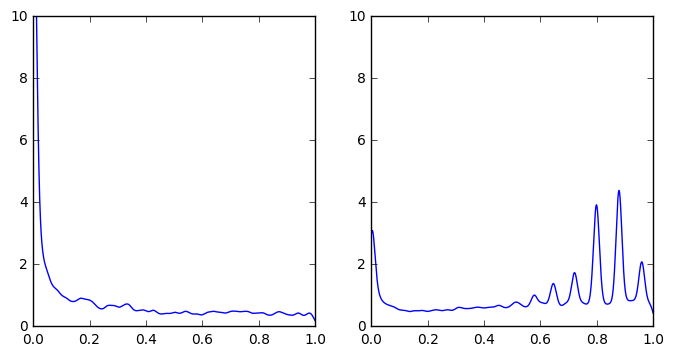

In [8]:
kde1 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(x1[:, np.newaxis])
x_test = np.concatenate( [np.arange(0,0.1,0.00001), np.arange(0.1,1,0.0001)], 0)
log_pdf = kde1.score_samples(x_test[:, np.newaxis])
pdf = np.exp(log_pdf)
plt.figure(figsize = (8,4))
plt.subplot(1,2, 1)
plt.plot(x_test, pdf)
plt.ylim([0,10])

kde2 = KernelDensity(kernel='gaussian', bandwidth=0.01).fit(x2[:, np.newaxis])
log_pdf2 = kde2.score_samples(x_test[:, np.newaxis])
pdf2 = np.exp(log_pdf2)

plt.subplot(1, 2, 2)
plt.plot(x_test, pdf2)
plt.ylim([0,10])


In [9]:
fa1 = np.mean(pdf[x_test>0.9])
fb1 = np.mean(pdf2[x_test>0.9])
print(fa1, fb1)

(0.38012230333365937, 1.1202335822980125)


In [10]:
na = len(x1)
nb = len(x2)

In [11]:
fa = pdf
fb = pdf2

In [40]:
ta_large = 1.0
ta_small = 0.0

tas = []
fdrs = []
tds = []
tbs = []
for ta in np.arange(0,0.5, 0.001):

    fa_t = np.exp(kde1.score_samples(np.array([[ta]])))[0]

    tb = x_test[np.where(np.abs(fb[x_test < 0.5] - fa_t) == np.min(np.abs(fb[x_test< 0.5] - fa_t)))[0]][0]

    fp = ta * fa1 * na + tb * fb1 * nb
    td = sum(x1 < ta) + sum(x2 < tb)

    fdr = fp/float(td)
    
    tas.append(ta)
    tbs.append(tb)
    fdrs.append(fdr)
    tds.append(td)

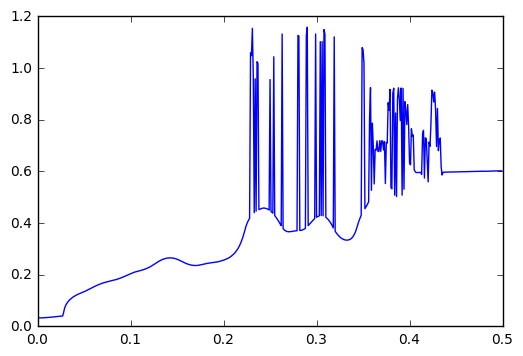

In [41]:
plt.plot(tas, fdrs)

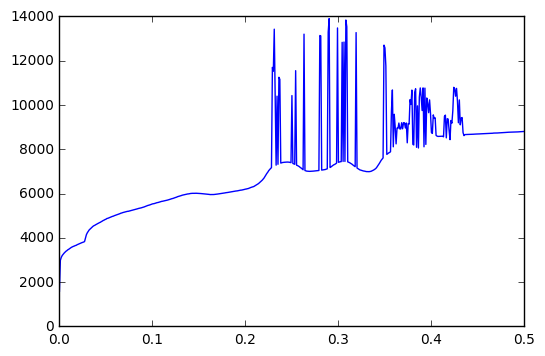

In [42]:
plt.plot(tas, tds)

In [43]:
fdrs = np.array(fdrs)
idx = np.where(np.min(np.abs(fdrs - 0.1)) == np.abs(fdrs - 0.1))[0][0]

In [44]:
tds[idx]

4439

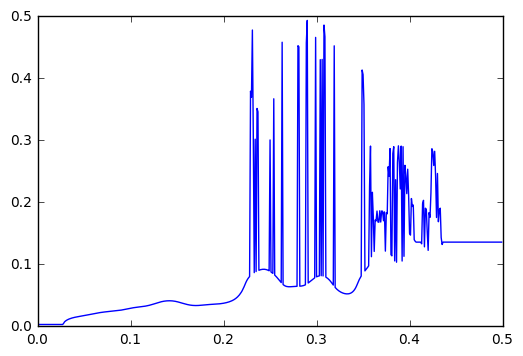

In [45]:
plt.plot(tas, tbs)